In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/pythonml/main/data/HousePrice.csv')

In [3]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [4]:
df.shape

(1460, 2)

In [5]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


In [7]:
print(df['SquareFeet'].corr(df['SalePrice']))

0.7086244776126523


In [8]:
print(df.corr())

            SquareFeet  SalePrice
SquareFeet    1.000000   0.708624
SalePrice     0.708624   1.000000


<AxesSubplot:>

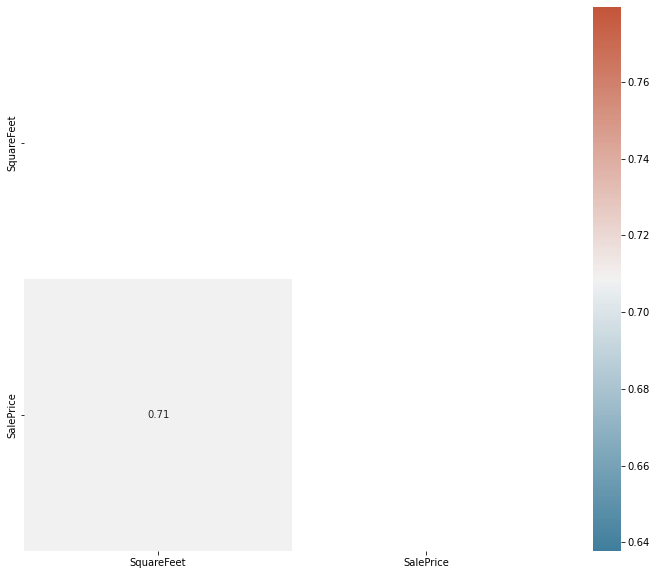

In [9]:
# Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

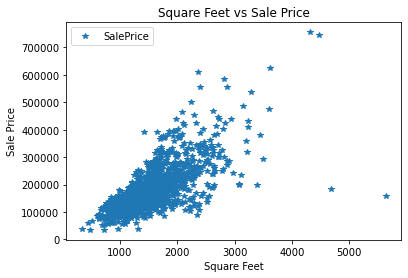

In [10]:
df.plot(x='SquareFeet', y='SalePrice', style='*')
plt.title('Square Feet vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()


In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
lr = LinearRegression().fit(X_train, y_train)
get_cv_scores(lr)


CV Mean:  0.5147052949885541
STD:  0.06563558755274343




In [14]:
print(lr.intercept_)
print(lr.coef_)

13330.293444921088
[110.26434426]


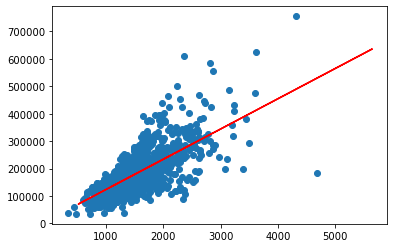

In [15]:
y_pred = lr.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()


In [16]:
lr.predict([[2515]])

array([290645.11925904])

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()


,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

print('R-Squared:',metrics.r2_score(df['Actual'],df['Predicted']))


R-Squared: 0.433264794803935
